# Timeseries of stratification and restratification

In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import seaborn as sns
from scipy import signal
from scipy.stats import pearsonr
sns.set_style('darkgrid')
from info import datadir, figdir

import warnings
warnings.filterwarnings('ignore')

## Stratification

In [2]:
data = pd.read_csv(datadir+'monthly_timeseries.csv',index_col=0)
dates = pd.to_datetime(data['dates'])

SI_all_upper = data['SI_all_upper']
SI_all_lower = data['SI_all_lower']
SI_all_total = data['SI_all_total']

### Total stratification index per layer

In [3]:
cmap = matplotlib.cm.get_cmap('cmo.thermal')
colors = np.array([cmap(0.55),cmap(0.75)])

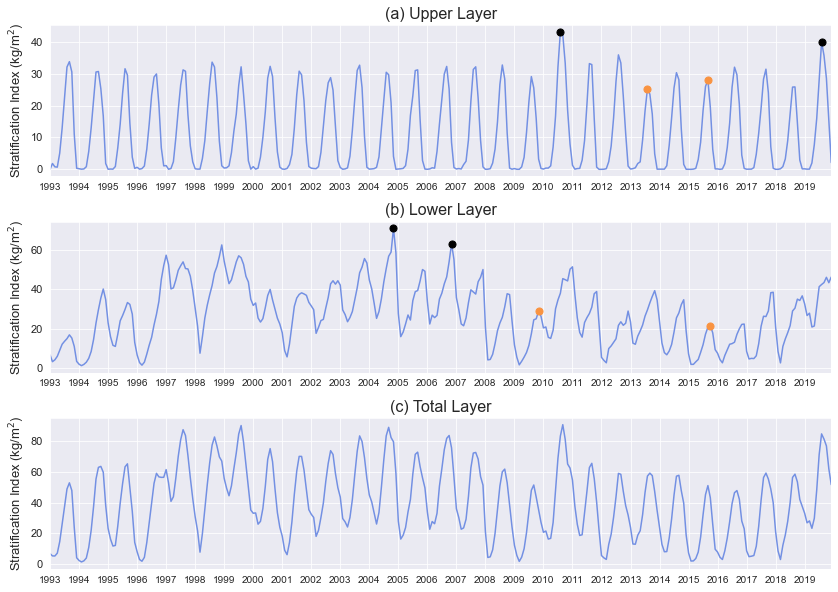

In [4]:
def plotStrat(ax,strat,color,contrib='Total',legend=None):
    time = range(len(dates))
    ax.tick_params(axis='y', labelsize=11)
    if contrib=='Total':
        ax.set_ylabel('Stratification Index (kg/m$^2$)', fontsize=13)
        loc = 'upper left'
    else:
        ax.set_ylabel('Stratification Index (m)', fontsize=13)
        loc = 'upper right'
    if legend==None:
        ax.plot(time,strat,color=color)
    else:
        ax.plot(time,strat,color=color,label=legend)
        ax.legend(fontsize=13,loc=loc)
    ax.set_xlim(time[0],time[-1])
    step = 12
    ax.set_xticks(time[0::step])
    ax.set_xticklabels([dates[i].year for i in np.arange(0,len(time[0::step])*step,step)],fontsize=10)

sns.set_style('darkgrid')
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,10))

cmap = matplotlib.cm.get_cmap('cmo.dense')
c_sigma = cmap(0.4)

# UPPER LAYER
plotStrat(ax1,SI_all_upper,c_sigma)
ax1.set_title('(a) Upper Layer', fontsize=16)
ax1.scatter(211,SI_all_upper[211],s=50,c='k',zorder=10) # high: 2010
ax1.scatter(319,SI_all_upper[319],s=50,c='k',zorder=10) # high: 2019
ax1.scatter(247,SI_all_upper[247],s=50,color=colors[1],zorder=10) # low: 2013
ax1.scatter(272,SI_all_upper[272],s=50,color=colors[1],zorder=10) # low: 2015

# LOWER LAYER
plotStrat(ax2,SI_all_lower,c_sigma)
ax2.set_title('(b) Lower Layer', fontsize=16)
ax2.scatter(142,SI_all_lower[142],s=50,c='k',zorder=10) # high: 2004
ax2.scatter(166,SI_all_lower[166],s=50,c='k',zorder=10) # high: 2006
ax2.scatter(202,SI_all_lower[202],s=50,color=colors[1],zorder=10) # low: 2009
ax2.scatter(273,SI_all_lower[273],s=50,color=colors[1],zorder=10) # low: 2015

# TOTAL
plotStrat(ax3,SI_all_total,c_sigma)
ax3.set_title('(c) Total Layer', fontsize=16)

plt.subplots_adjust(hspace=0.3)
plt.savefig(figdir+'strat_timeseries.png',bbox_inches='tight')
plt.show()

## Restratification

In [5]:
data = pd.read_csv(datadir+'annual_timeseries.csv',index_col=0)

conv = data['conv']

restrat_all_upper = data['restrat_all_upper']
restrat_all_lower = data['restrat_all_lower']
restrat_all_total = data['restrat_all_total']

### Restratification per layer

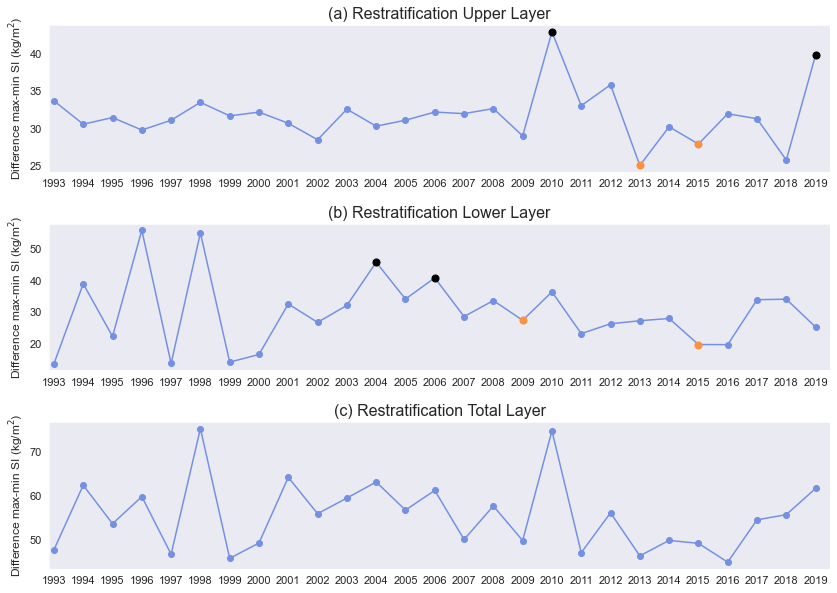

In [6]:
def plotRestratification(ax,restrat,color,contrib='Total',start=0,legend=None):
    time = range(len(dates))
    ax.plot(time[start::12],restrat,color=color,label=legend)
    if contrib=='Total':
        ax.set_ylabel('Difference max-min SI (kg/m$^2$)', fontsize=12)
        loc = 'upper left'
    else:
        ax.set_ylabel('Difference max-min SI (m)', fontsize=12)
        loc = 'upper right'
    if legend!=None:
        ax.legend(fontsize=13,loc=loc)
    ax.scatter(time[start::12],restrat,color=color)
    ax.set_xlim(time[0]-2,time[-1]-5)
    ax.set_xticks(time[start::12])
    ax.set_xticklabels([dates[i].year for i in np.arange(0,len(time[0::12])*12,12)],fontsize=11)
    ax.tick_params(axis='y',labelsize=11)
    return restrat

def plotConvection(ax,conv,color):
    time = range(len(dates))
    ax.plot(time[0::12],conv,color=color)
    ax.scatter(time[0::12],conv,color=color)
    ax.set_xlim(time[0],time[-1])
    ax.set_xticks(time[0::12])
    ax.set_xticklabels([dates[i].year for i in np.arange(0,len(time[0::12])*12,12)],fontsize=11)
    ax.set_ylabel('Mixed Layer Depth (m)',fontsize=12)
    ax.tick_params(axis='y',labelsize=11)
    ax.set_ylim(0,1850)
    ax.set_ylim(ax.get_ylim()[::-1])

sns.set_style('dark')
fig, (ax2,ax3,ax4) = plt.subplots(3,1,figsize=(14,10))

cmap = matplotlib.cm.get_cmap('cmo.dense')

# UPPER LAYER SI
plotRestratification(ax2,restrat_all_upper,c_sigma)
ax2.scatter(204,restrat_all_upper[17],s=50,c='k',zorder=10) # high: 2010
ax2.scatter(312,restrat_all_upper[26],s=50,c='k',zorder=10) # high: 2019
ax2.scatter(240,restrat_all_upper[20],s=50,color=colors[1],zorder=10) # low: 2013
ax2.scatter(264,restrat_all_upper[22],s=50,color=colors[1],zorder=10) # low: 2015
ax2.set_title('(a) Restratification Upper Layer', fontsize=16)

# LOWER LAYER SI
plotRestratification(ax3,restrat_all_lower,c_sigma)
ax3.set_title('(b) Restratification Lower Layer', fontsize=16)
ax3.scatter(132,restrat_all_lower[11],s=50,c='k',zorder=10) # high: 2004
ax3.scatter(156,restrat_all_lower[13],s=50,c='k',zorder=10) # high: 2006
ax3.scatter(192,restrat_all_lower[16],s=50,color=colors[1],zorder=10) # low: 2009
ax3.scatter(264,restrat_all_lower[22],s=50,color=colors[1],zorder=10) # low: 2015

# TOTAL SI
plotRestratification(ax4,restrat_all_total,c_sigma)
ax4.set_title('(c) Restratification Total Layer', fontsize=16)

plt.subplots_adjust(hspace=0.35)
plt.savefig(figdir+'restrat_timeseries.png',bbox_inches='tight')
plt.show()

## Peaks in stratification

In [7]:
data = sio.loadmat(datadir+'timedepth_DCA.mat')
MLD = data['mld_mean'][0]

# Find the maxima/minima in stratification and convection
def findMaxsMins(data,height_maxs=None,distance_maxs=None,height_mins=None,distance_mins=None,plot=False):
    maxs = signal.find_peaks(data,height=height_maxs,distance=distance_maxs)[0]
    mins = signal.find_peaks(data*-1,height=height_mins,distance=distance_mins)[0]
    if plot:
        fig, ax = plt.subplots(1,1,figsize=(12,4))
        ax.plot(time,data)
        ax.set_xlim(time[0],time[-1])
        ax.set_xticks(time[0::24])
        ax.set_xticklabels([dates[i].year for i in np.arange(0,len(time[0::24])*24,24)],fontsize=11)
        ax.tick_params(axis='y', labelsize=11)
        ax.scatter(time[maxs],data[maxs],color='black')
        ax.scatter(time[mins],data[mins],color='black')
    return maxs,mins

# ALL
maxs_all_total,mins_all_total = findMaxsMins(SI_all_total,distance_maxs=7,distance_mins=8)#,plot=True)
maxs_all_upper,mins_all_upper = findMaxsMins(SI_all_upper,distance_maxs=8,distance_mins=8)#,plot=True)
mins_all_upper[0] = 0 # correct for first min in upper layer
maxs_all_lower,mins_all_lower = findMaxsMins(SI_all_lower,distance_maxs=7,distance_mins=8)#,plot=True)

# Finally, also maxs in MLD
maxs_mld = np.hstack(([0],signal.find_peaks(MLD,height=100,distance=3)[0]))

In [8]:
max_strat_months = np.array([dates[maxs_all_total[i]].month for i in range(len(maxs_all_total))])
min_strat_months = np.array([dates[mins_all_total[i]].month for i in range(len(mins_all_total))])
max_mld_months = np.array([dates[maxs_mld[i]].month for i in range(len(maxs_mld))])


months_ab = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',\
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

print("Months with maximum convection")
print("----------------------------------")
m = np.min(max_mld_months)
while m<=np.max(max_mld_months):
    print(months_ab[m]+': '+str(len(np.where(max_mld_months==m)[0])))
    m+=1

print("")    
print("Months with minimum stratification")
print("----------------------------------")
m = np.min(min_strat_months)
while m<=np.max(min_strat_months):
    print(months_ab[m]+': '+str(len(np.where(min_strat_months==m)[0])))
    m+=1
    
print("")    
print("Months with maximum stratification")
print("----------------------------------")
m = np.min(max_strat_months)
while m<=np.max(max_strat_months):
    if len(np.where(max_strat_months==m)[0])>0:
        print(months_ab[m]+': '+str(len(np.where(max_strat_months==m)[0])))
    m+=1   
    
print("")
print("Number of years in which max conv and min strat don't coincide: "
      +str(len(np.where(min_strat_months!=max_mld_months)[0])))

Months with maximum convection
----------------------------------
Jan: 1
Feb: 14
Mar: 11
Apr: 1

Months with minimum stratification
----------------------------------
Feb: 6
Mar: 17
Apr: 4

Months with maximum stratification
----------------------------------
Jan: 1
Aug: 6
Sep: 18
Oct: 2

Number of years in which max conv and min strat don't coincide: 10


In [9]:
max_strat_months = np.array([dates[maxs_all_upper[i]].month for i in range(len(maxs_all_upper))])
min_strat_months = np.array([dates[mins_all_upper[i]].month for i in range(len(mins_all_upper))])


months_ab = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',\
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

print("")    
print("Months with minimum stratification - UPPER LAYER")
print("------------------------------------------------")
m = np.min(min_strat_months)
while m<=np.max(min_strat_months):
    if len(np.where(min_strat_months==m)[0])>0:
        print(months_ab[m]+': '+str(len(np.where(min_strat_months==m)[0])))
    m+=1
    
print("")    
print("Months with maximum stratification - UPPER LAYER")
print("------------------------------------------------")
m = np.min(max_strat_months)
while m<=np.max(max_strat_months):
    if len(np.where(max_strat_months==m)[0])>0:
        print(months_ab[m]+': '+str(len(np.where(max_strat_months==m)[0])))
    m+=1   


Months with minimum stratification - UPPER LAYER
------------------------------------------------
Jan: 11
Feb: 12
Mar: 2
Dec: 2

Months with maximum stratification - UPPER LAYER
------------------------------------------------
Aug: 16
Sep: 11


In [10]:
max_strat_months = np.array([dates[maxs_all_lower[i]].month for i in range(len(maxs_all_lower))])
min_strat_months = np.array([dates[mins_all_lower[i]].month for i in range(len(mins_all_lower))])


months_ab = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',\
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

print("")    
print("Months with minimum stratification - LOWER LAYER")
print("------------------------------------------------")
m = np.min(min_strat_months)
while m<=np.max(min_strat_months):
    if len(np.where(min_strat_months==m)[0])>0:
        print(months_ab[m]+': '+str(len(np.where(min_strat_months==m)[0])))
    m+=1
    
print("")    
print("Months with maximum stratification - LOWER LAYER")
print("------------------------------------------------")
m = np.min(max_strat_months)
while m<=np.max(max_strat_months):
    if len(np.where(max_strat_months==m)[0])>0:
        print(months_ab[m]+': '+str(len(np.where(max_strat_months==m)[0])))
    m+=1   


Months with minimum stratification - LOWER LAYER
------------------------------------------------
Feb: 6
Mar: 12
Apr: 8
May: 1

Months with maximum stratification - LOWER LAYER
------------------------------------------------
Jan: 2
Jul: 1
Aug: 2
Sep: 3
Oct: 3
Nov: 9
Dec: 7
